# US accident   Exploratory Data Analysis Project

1. talk about EDA
2. talk about the dataset(source,what it  contains,how it will be useful)
           - Kaggle 
           -  information  about accident
           - mention that this does not contain data about new york  

#data download

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
download_url="https://www.kaggle.com/sobhanmoosavi/us-accidents"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: apurvadwivedi
Your Kaggle Key: ··········


  2%|▏         | 5.00M/290M [00:00<00:06, 43.8MB/s]

100%|██████████| 290M/290M [00:04<00:00, 69.7MB/s]


In [3]:
data_file='./us-accidents/US_Accidents_Dec20_Updated.csv'

#data preparation and cleaning

1.   -load the file using pandas
2.  loook at some information about the data and columns
3. -fix missing and incorrect values



In [4]:
import pandas as pd

In [5]:
df=pd.read_csv(data_file)

In [6]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
len(df.columns)

47

In [9]:
len(df)

2906610

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


14

In [13]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [14]:
df.isna()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906606,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906608,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum().sort_values(ascending=False)

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

In [16]:
missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

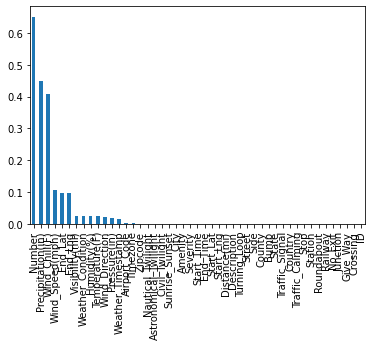

In [17]:
missing_percentage.plot(kind='bar')

In [18]:
missing_percentage[missing_percentage != 0]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

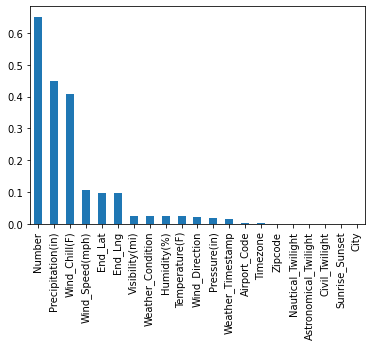

In [19]:
missing_percentage[missing_percentage != 0].plot(kind='bar')

remove unwanted columns 

#Exploratory data anlysis and visualization 
columns that we are going to analize
1. city
2. start time
3. start lati , start long
4. temperature
5. weather condition

In [20]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [21]:
df.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [22]:
cities=df.City.unique()

cities[:100]

array(['Greenville', 'Charlotte', 'Los Gatos', 'Carson City',
       'Fort Lauderdale', 'Rifle', 'Whittier', 'Franklin', 'Valencia',
       'Dover', 'Yonkers', 'Garland', 'Tucson', 'Oakland', 'Houston',
       'Los Angeles', 'Fontana', 'Saint Clair Shores',
       'Hopewell Junction', 'Atlanta', 'Fuquay Varina', 'Daleville',
       'Martinez', 'North Charleston', 'Austin', 'Seal Beach',
       'Cedar Springs', 'Miami', 'Corfu', 'Indianapolis', 'Baton Rouge',
       'Grand Terrace', 'Providence Forge', 'Tempe', 'Pittsford',
       'Pittsburgh', 'Sacramento', 'Latham', 'Homosassa', 'Fort Worth',
       'Redding', 'Downey', 'Minneapolis', 'Lake Worth', 'Grand Rapids',
       'Aldrich', 'Richmond', 'North Highlands', 'Dublin', 'Stafford',
       'Doswell', 'Flint', 'Ballston Spa', 'Baldwin Park',
       'Monroe Township', 'Dallas', 'El Paso', 'Jacksonville',
       'Moreno Valley', 'Summerfield', 'Phoenix', 'San Diego',
       'Capitol Heights', 'East Hartford', 'Lafayette', 'Calpine',
   

In [23]:
len(cities)

11790

In [24]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
               ...  
Hazelhurst         1
Cooks              1
Willshire          1
Ola                1
Lansford           1
Name: City, Length: 11789, dtype: int64

In [25]:
cities_by_accidents[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [26]:
'New york' in df.City

False

data for new york is not present here

In [27]:
'NY' in df.State

False

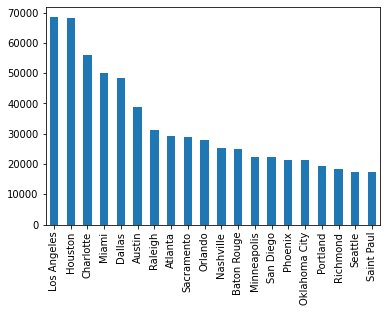

In [28]:
cities_by_accidents[:20].plot(kind='bar')

In [29]:
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


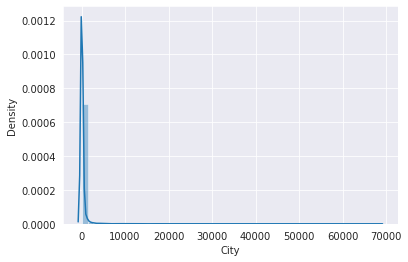

In [30]:
sns.distplot(cities_by_accidents)

In [31]:
high_acciident_cities=cities_by_accidents[cities_by_accidents>=1000]
low_accident_cities=cities_by_accidents[cities_by_accidents<1000]

In [32]:
len(high_acciident_cities)

513

In [33]:
#percentage of  high_acciident_cities
len(high_acciident_cities)/len(cities) 

0.04351145038167939

In [34]:
len(low_accident_cities)

11276

In [35]:
#percentage of  low_acciident_cities
len(low_accident_cities)/len(cities)

0.9564037319762511

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


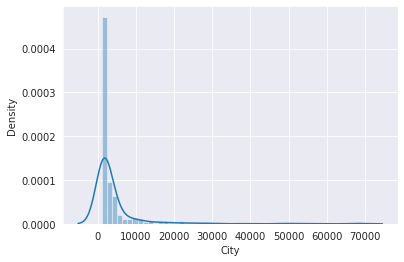

In [36]:
sns.distplot(high_acciident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


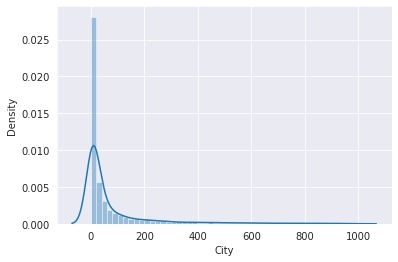

In [37]:
sns.distplot(low_accident_cities)

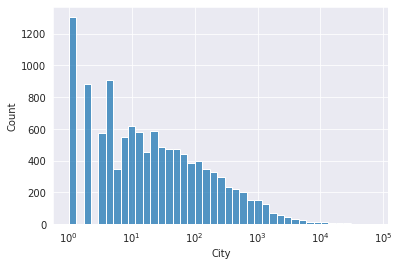

In [38]:
sns.histplot(cities_by_accidents,log_scale=True)

In [39]:
cities_by_accidents[cities_by_accidents==1]

Dyess           1
Alger           1
Meadow          1
Coleharbor      1
Breezy Point    1
               ..
Hazelhurst      1
Cooks           1
Willshire       1
Ola             1
Lansford        1
Name: City, Length: 1306, dtype: int64

###Start time

In [40]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

convert it to date time formate as it is presently in string format

In [41]:
df.Start_Time=pd.to_datetime(df.Start_Time)

In [42]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [43]:
#return hour(at which the accident occured) from the date and time 
df.Start_Time[0].hour

8

In [44]:
df.Start_Time.dt.hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

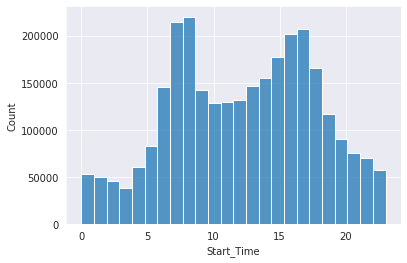

In [45]:
sns.histplot(df.Start_Time.dt.hour,bins=24)
#this does not give a clear insite of the data so we wll use other graph

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


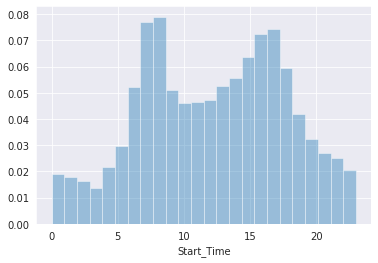

In [46]:
#plotting persentage of values to that of the hours
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

## Insits 
1. a high % of accidents occurs between 6 to 10 am(
probablly people gooing to work)
2. next higest accidents is between 3 
pm to 6 pm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


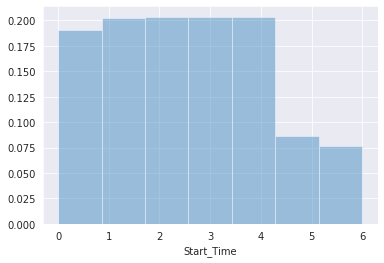

In [47]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

In [48]:
sunday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==6]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


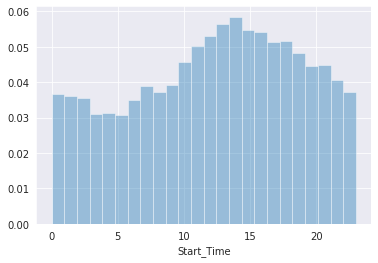

In [49]:
sns.distplot(sunday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


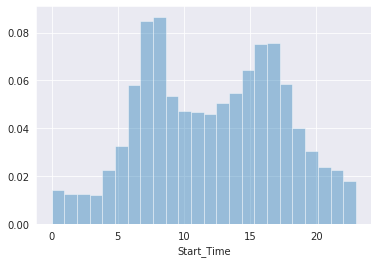

In [50]:
monday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


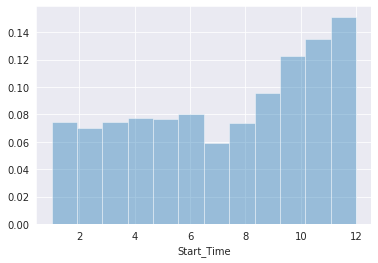

In [51]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


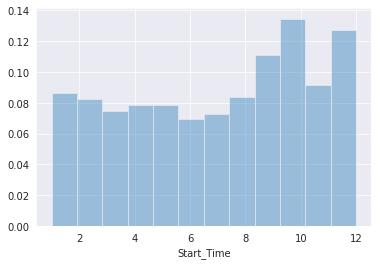

In [52]:
df_2019= df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


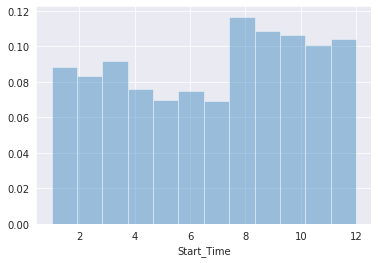

In [53]:
df_2019= df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


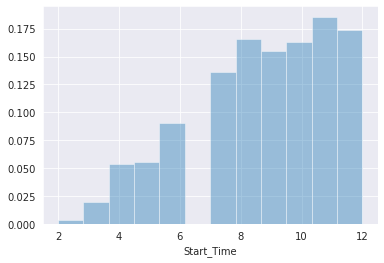

In [54]:
df_2019= df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

In [55]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [56]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

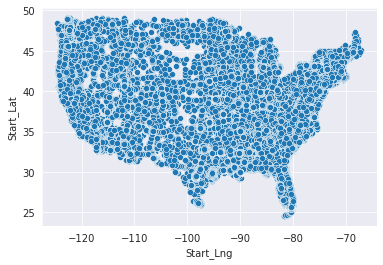

In [59]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

In [60]:
sample_df=df.sample(int(0.1*len(df)))# scatter plot with 10% sample

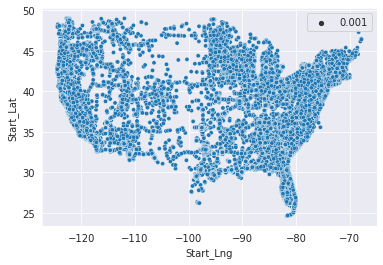

In [62]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.001)

##plotting map for identifiing the location on the map

In [63]:
import folium

In [67]:
lat, lon= df.Start_Lat[0],df.Start_Lng[0]
lat, lon

(34.808868, -82.26915699999998)

In [65]:
folium.Map()

In [68]:
map=folium.Map()
marker=folium.Marker((lat,lon))
marker.add_to(map)
map

#if we want to itrrate over whole latitue column and longitude column 

In [70]:
for x in df[['Start_Lat','Start_Lng']].sample(100).iteritems():
  print(x)

('Start_Lat', 264812     33.873314
2029848    39.246310
1515360    36.770733
1127363    42.916548
321982     44.926888
             ...    
1916852    27.944875
508888     29.602791
361839     33.889020
1269548    30.487183
1265603    43.180721
Name: Start_Lat, Length: 100, dtype: float64)
('Start_Lng', 264812    -118.248765
2029848    -84.365740
1515360   -121.765267
1127363    -83.044850
321982     -93.144730
              ...    
1916852    -82.505830
508888     -82.375153
361839    -117.880700
1269548    -88.217064
1265603    -83.717026
Name: Start_Lng, Length: 100, dtype: float64)


##Creatng a heat map 
with 1% data only as this much big data can't be proccessed with this machine  
- zip creates pair of the things 

In [71]:
from folium.plugins import HeatMap

In [73]:
sample_df=df.sample(int(0.01*len(df)))
lat_lon_pair=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [74]:
map=folium.Map()
HeatMap(lat_lon_pair).add_to(map)
map

## Insites 
1.  on weekends there is less accidents (probally work off days people prefer to stay at home)
2. on sundays there is more spread out distribution(during the afternoon most accidents occur)
3. and when we check for mondays it gives a very different trend 
4. on sundays the peek occurs  between 10 am and 3 pm
6. much data is missing for 2016

## question
is the distribution of accidents by hours the same on weekends as on weekdays 

#Question & answers
1. are there more accidents in warmer or colder areas?
2. which 5  states have highest number of accidents? how about per capita?
3. does new york with hightest population  show?if yes  ,why count is lower if  this is hightest populated city?
4. Among the top 100 cities in number of accidents, which state do they belong to most frequently .
5. what time the accidents most frequent in ?
6. which days of the week have most accidents 
7. which days of the months have most accidents 
8. what is the trend of accidents year after year(increase / decrease)
9. when is the accidents per unit of traffic the highest 




#Summary and Conclusion

Insights:
1. No data for New York(highest populated city) 
2. Less than 4%of cities have more than 1000 accidents per year
3. over 1306 cities reported just 1 accident
4. the number of accidents decrease exponentially